<a href="https://colab.research.google.com/github/TWBanana/CS652/blob/master/Wifi_Localization/WifLocalization_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
from scipy import ndimage
import seaborn as sns
import matplotlib.ticker as ticker
from datetime import datetime
import pytz
%matplotlib inline


In [ ]:
train_df = pd.read_csv('/content/drive/MyDrive/NJIT/CS652/TrainingData.csv')
validate_df = pd.read_csv('/content/drive/MyDrive/NJIT/CS652/ValidationData.csv')

In [ ]:
train_df.columns

Index(['WAP001', 'WAP002', 'WAP003', 'WAP004', 'WAP005', 'WAP006', 'WAP007',
       'WAP008', 'WAP009', 'WAP010',
       ...
       'WAP520', 'LONGITUDE', 'LATITUDE', 'FLOOR', 'BUILDINGID', 'SPACEID',
       'RELATIVEPOSITION', 'USERID', 'PHONEID', 'TIMESTAMP'],
      dtype='object', length=529)

In [ ]:
diff1 = set(train_df.columns) - set(validate_df.columns)
diff2 = set(validate_df.columns) - set(train_df.columns)
print(diff1, diff2)

set() set()


In [ ]:
df = pd.concat([train_df, validate_df])

In [ ]:
print(f"there are {df['USERID'].nunique()} different users.")
print(f"list of user ids: {df['USERID'].unique()}\n")
print(f"entries per user:\n{df['USERID'].value_counts()}")

there are 19 different users.
list of user ids: [ 2 11  3  4  5  6  7  8  9 16 10 12 13 14 15  1 17 18  0]

entries per user:
11    4516
1     2737
14    1596
7     1383
0     1111
2     1091
9     1066
16    1032
6      980
10     913
13     841
17     724
5      610
8      507
15     498
18     440
12     437
4      374
3      192
Name: USERID, dtype: int64


In [ ]:
print(f"there are {df['PHONEID'].nunique()} different phones used.")
print(f"list of user ids: {df['PHONEID'].unique()}\n")
print(f"entries per phone:\n{df['PHONEID'].value_counts()}")

there are 25 different phones used.
list of user ids: [23 13 16 18  3 19  6  1 14  8 24 17  7 11 22 10  0  2 12 20 21  4  9 15
  5]

entries per phone:
13    4885
14    4863
7     1596
6     1383
23    1091
19     980
8      913
17     841
22     724
3      610
1      507
11     498
10     440
24     437
18     374
20     213
16     192
0      120
9       77
12      70
4       69
21      60
2       52
15      36
5       17
Name: PHONEID, dtype: int64


In [ ]:
df.groupby('USERID')['PHONEID'].unique()

USERID
0     [0, 13, 2, 12, 20, 21, 4, 9, 15, 5, 14]
1                                        [14]
2                                        [23]
3                                        [16]
4                                        [18]
5                                         [3]
6                                        [19]
7                                         [6]
8                                         [1]
9                                        [14]
10                                        [8]
11                                       [13]
12                                       [24]
13                                       [17]
14                                        [7]
15                                       [11]
16                                       [14]
17                                       [22]
18                                       [10]
Name: PHONEID, dtype: object

In [ ]:
df.groupby('PHONEID')['USERID'].unique()

PHONEID
0               [0]
1               [8]
2               [0]
3               [5]
4               [0]
5               [0]
6               [7]
7              [14]
8              [10]
9               [0]
10             [18]
11             [15]
12              [0]
13          [11, 0]
14    [9, 16, 1, 0]
15              [0]
16              [3]
17             [13]
18              [4]
19              [6]
20              [0]
21              [0]
22             [17]
23              [2]
24             [12]
Name: USERID, dtype: object

### number -104 ~ 0 represent the strength of the signal.
### -104 is the weakest and 0 is the highest.
### 100 represent that the WAP was not been detected.

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


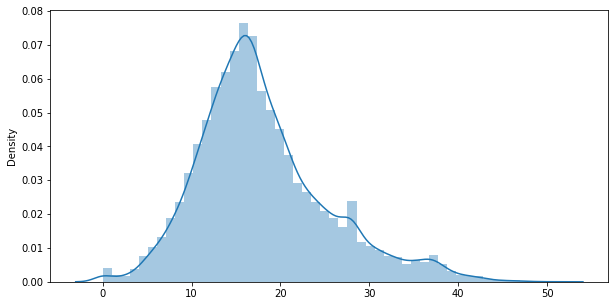

In [ ]:
wap_df = train_df[train_df.columns[:520]]
no_of_waps = wap_df[wap_df != 100].count(axis=1)

plt.figure(figsize=(10,5))
sns.distplot(no_of_waps)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


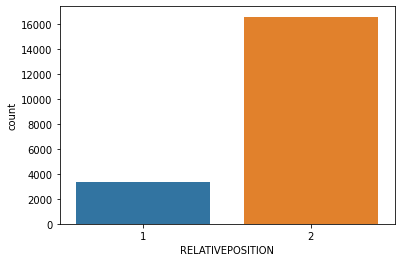

In [ ]:
sns.countplot(train_df['RELATIVEPOSITION'])

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


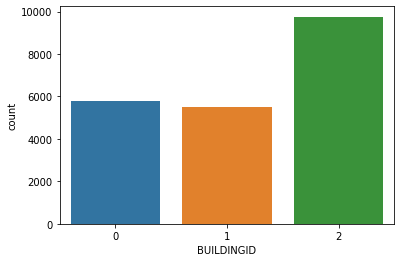

In [ ]:
sns.countplot(df['BUILDINGID'])

In [ ]:
print(f"no of floors in each building:\n{df.groupby('BUILDINGID')['FLOOR'].unique()}")

no of floors in each building:
BUILDINGID
0       [0, 2, 1, 3]
1       [2, 0, 1, 3]
2    [3, 2, 4, 1, 0]
Name: FLOOR, dtype: object


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


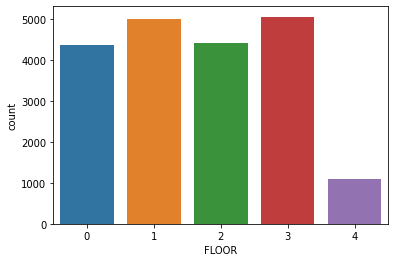

In [ ]:
sns.countplot(train_df['FLOOR'])

In [ ]:
temp1 = df[df['BUILDINGID']==0].groupby('FLOOR')['SPACEID'].nunique()
temp2 = df[df['BUILDINGID']==1].groupby('FLOOR')['SPACEID'].nunique()
temp3 = df[df['BUILDINGID']==2].groupby('FLOOR')['SPACEID'].nunique()

print(f"floorwise distribution of spaces in building-0:\n{temp1}\n")
print(f"floorwise distribution of spaces in building-1:\n{temp2}\n")
print(f"floorwise distribution of spaces in building-2:\n{temp3}\n")

floorwise distribution of spaces in building-0:
FLOOR
0    55
1    67
2    69
3    69
Name: SPACEID, dtype: int64

floorwise distribution of spaces in building-1:
FLOOR
0    50
1    39
2    46
3    31
Name: SPACEID, dtype: int64

floorwise distribution of spaces in building-2:
FLOOR
0    45
1    61
2    58
3    92
4    66
Name: SPACEID, dtype: int64



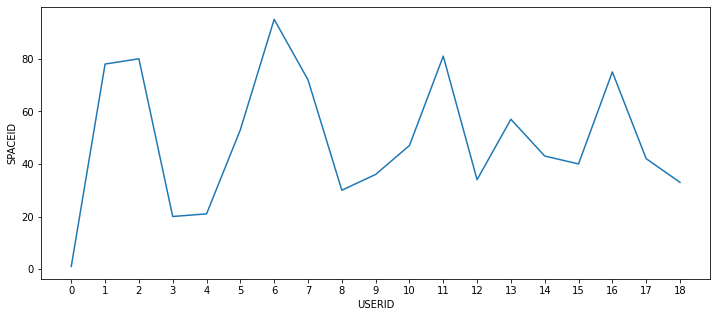

In [ ]:
plt.figure(figsize=(12,5))
g = sns.lineplot(data=df.groupby('USERID')['SPACEID'].nunique())
g.set_xticks(np.arange(19))
print()

In [ ]:
df.groupby('SPACEID')['USERID'].unique()

SPACEID
0                     [0]
1            [13, 17, 18]
2      [2, 4, 13, 17, 18]
3      [2, 4, 13, 17, 18]
4      [2, 4, 13, 17, 18]
              ...        
248         [2, 6, 7, 16]
249               [7, 16]
250                [2, 6]
253                   [6]
254                   [6]
Name: USERID, Length: 124, dtype: object

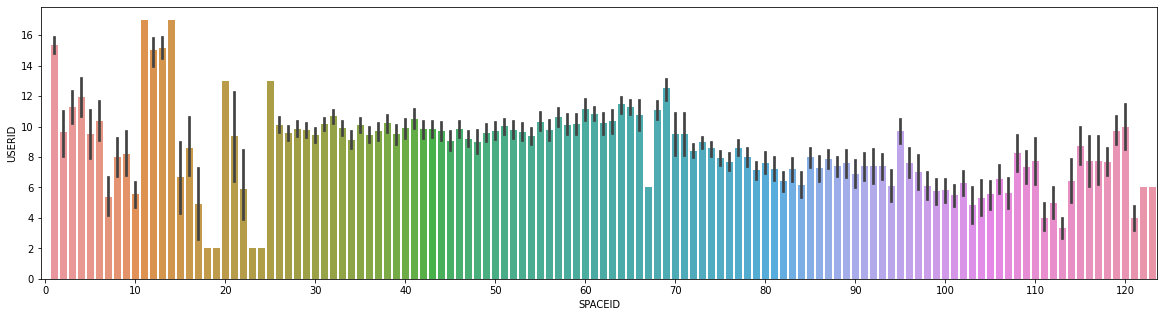

In [ ]:
plt.figure(figsize=(20,5))
ax = sns.barplot(data=df, x='SPACEID', y='USERID')
# g.set_xticklabels(list(range(0,254,10)))
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
ax.xaxis.set_major_formatter(ticker.ScalarFormatter())
plt.show()

### Prediction of longitude and latitude using Neural network regression method.¶
- for training data x : we need only the data from WAP001 to WAP520 </p>
- for training data y : we need only two columns, longitude and latitude. 

In [ ]:
train_x = train_df.drop(columns=["LONGITUDE", "LATITUDE", "FLOOR", "BUILDINGID", "SPACEID", "RELATIVEPOSITION", "USERID", "PHONEID", "TIMESTAMP"])
train_y = train_df[["LONGITUDE", "LATITUDE"]]

test_x = validate_df.drop(columns=["LONGITUDE", "LATITUDE", "FLOOR", "BUILDINGID", "SPACEID", "RELATIVEPOSITION", "USERID", "PHONEID", "TIMESTAMP"])
test_y = validate_df[["LONGITUDE", "LATITUDE"]]




* Since this is a numeric data, Sequential model is a better fit. 
* First layer is to flaten the data.
* For the hidden layer, the activation we are using is "relu".


_tf.nn.relu </p>
f(x) = 0 for x < 0 </p>
f(x) = x for x >= 0_


* For the final layer, the activation is "linear".
* optimizer = adam, process neurons step by step.  
* loss: here we use the "mean squared error"

_A linear stack is a model without any branching. Every layer has one input and output. The output of one layer is the input of the layer below it._


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dense(2, activation = 'linear')
])
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=[tf.keras.metrics.RootMeanSquaredError(), tf.keras.metrics.CosineSimilarity(axis=1)]
)


In [ ]:
val_data = (test_x, test_y)

epochs = 5, we are going through the data 5 times in this model.

model.fit
- data : train_x, which is the data from WAP001 to WAP520
- label : train_y, is the longitute and latitute.
- validation_data : val_data that combines test_x and test_y

In [ ]:
epochs = 5
result = model.fit(
    train_x.values.astype('float'),
    train_y.values.astype('float'), 
    validation_data=val_data,
    epochs=epochs
)
model.summary()

Epoch 1/5
624/624 [==============================] - 2s 3ms/step - loss: 4631206297600.0000 - root_mean_squared_error: 2152023.7500 - cosine_similarity: 0.9962 - val_loss: 11849132032.0000 - val_root_mean_squared_error: 108853.7188 - val_cosine_similarity: 1.0000
Epoch 2/5
624/624 [==============================] - 2s 3ms/step - loss: 8297627136.0000 - root_mean_squared_error: 91091.3203 - cosine_similarity: 1.0000 - val_loss: 7325740544.0000 - val_root_mean_squared_error: 85590.5391 - val_cosine_similarity: 1.0000
Epoch 3/5
624/624 [==============================] - 2s 3ms/step - loss: 7268882432.0000 - root_mean_squared_error: 85257.7344 - cosine_similarity: 1.0000 - val_loss: 7064329216.0000 - val_root_mean_squared_error: 84049.5625 - val_cosine_similarity: 1.0000
Epoch 4/5
624/624 [==============================] - 2s 3ms/step - loss: 6595448832.0000 - root_mean_squared_error: 81212.3672 - cosine_similarity: 1.0000 - val_loss: 6808073216.0000 - val_root_mean_squared_error: 82511.04

Cosine_similarity reaches 1 after 2nd epoch.

We are using RMSE to do the following exploration.

After 2nd epoch, decrement in RMSE is ralatively low.

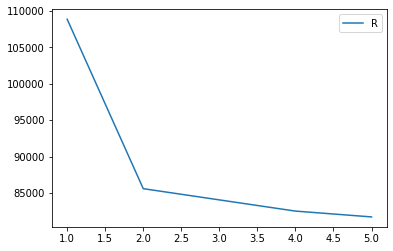

In [ ]:
x_vals = range(1, epochs+1)
plt.plot(x_vals, result.history['val_root_mean_squared_error'])
plt.legend("RMSE")
plt.show()

In [ ]:
df_sorted = df.sort_values(by=['TIMESTAMP'])

In [ ]:
temp = df_sorted.groupby('USERID')['BUILDINGID'].unique()
print(f"list of buildings visited by each user:\n{temp}")

list of buildings visited by each user:
USERID
0     [0, 1, 2]
1           [0]
2        [1, 2]
3           [2]
4           [1]
5           [2]
6           [2]
7        [1, 2]
8        [1, 2]
9        [1, 2]
10       [1, 2]
11    [0, 1, 2]
12          [2]
13       [1, 2]
14       [1, 2]
15          [2]
16       [1, 2]
17       [1, 2]
18       [1, 2]
Name: BUILDINGID, dtype: object


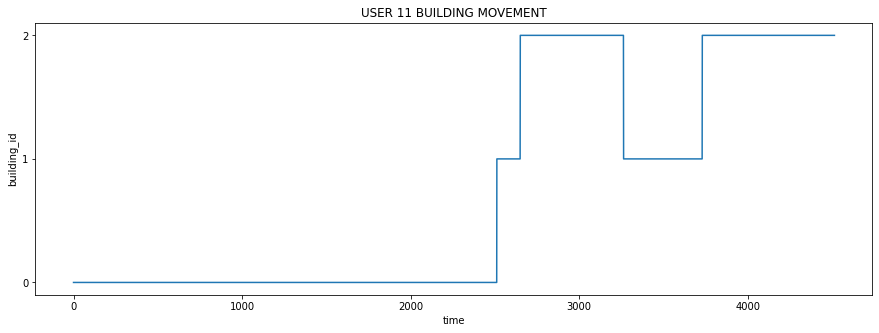

In [ ]:
user11_building_movement = df_sorted[df_sorted['USERID']==11]['BUILDINGID']

plt.figure(figsize=(15,5))
ax = sns.lineplot(data=user11_building_movement.to_numpy())
ax.set_title('USER 11 BUILDING MOVEMENT')
ax.set_xlabel('time')
ax.set_ylabel('building_id')
ax.set_yticks([0,1,2])
plt.show()

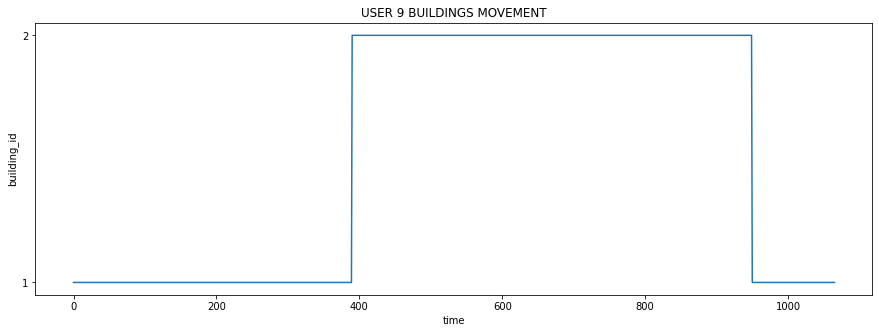

In [ ]:
user9_building_movement = df_sorted[df_sorted['USERID']==9]['BUILDINGID']

plt.figure(figsize=(15,5))
ax = sns.lineplot(data=user9_building_movement.to_numpy())
ax.set_yticks([1,2])
ax.set_title('USER 9 BUILDINGS MOVEMENT')
ax.set_xlabel('time')
ax.set_ylabel('building_id')
plt.show()

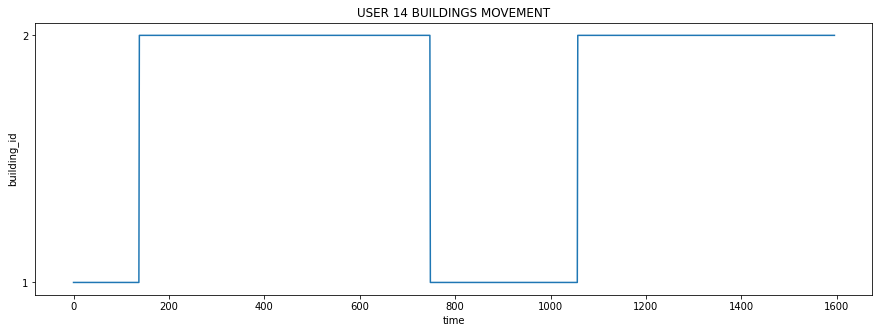

In [ ]:
user14_building_movement = df_sorted[df_sorted['USERID']==14]['BUILDINGID']

plt.figure(figsize=(15,5))
ax = sns.lineplot(data=user14_building_movement.to_numpy())
ax.set_yticks([1,2])
ax.set_title('USER 14 BUILDINGS MOVEMENT')
ax.set_xlabel('time')
ax.set_ylabel('building_id')
plt.show()

In [ ]:
ulist = [3, 5, 6, 12, 15]

In [ ]:
subdf = df_sorted[df_sorted['USERID'].isin(ulist)]
subdf.groupby('USERID')['BUILDINGID'].unique()

USERID
3     [2]
5     [2]
6     [2]
12    [2]
15    [2]
Name: BUILDINGID, dtype: object

In [ ]:
p = round(len(subdf)/len(df)*100, 2)
print(f"{p}% of entries consist of users who have visited only building-2")

12.91% of entries consist of users who have visited only building-2


In [ ]:
floors_visited = subdf.groupby('USERID')['FLOOR'].unique()
print(f"floors visited by each user:\n{floors_visited}")

floors visited by each user:
USERID
3        [4]
5     [2, 3]
6     [3, 4]
12       [1]
15       [1]
Name: FLOOR, dtype: object


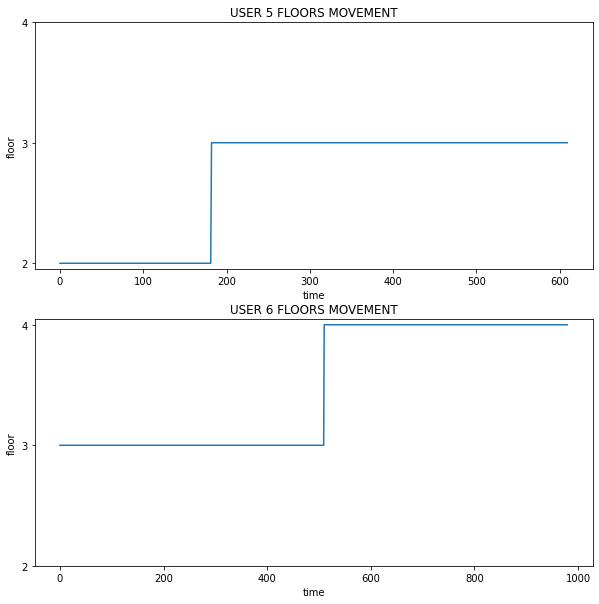

In [ ]:
plt.figure(figsize=(10,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

sns.lineplot(data=subdf[subdf['USERID']==5]['FLOOR'].to_numpy(), ax=ax1)
ax1.set_yticks([2,3,4])
ax1.set_title('USER 5 FLOORS MOVEMENT')
ax1.set_xlabel('time')
ax1.set_ylabel('floor')

sns.lineplot(data=subdf[subdf['USERID']==6]['FLOOR'].to_numpy(), ax=ax2)
ax2.set_yticks([2,3,4])
ax2.set_title('USER 6 FLOORS MOVEMENT')
ax2.set_xlabel('time')
ax2.set_ylabel('floor')

plt.show()

In [ ]:
mdf = df[df['USERID'].isin([12,15])]

In [ ]:
p = round(len(mdf)/len(df)*100, 2)
print(f"{p}% of entries consist of users who have visited only building-2 floor-1")

4.44% of entries consist of users who have visited only building-2 floor-1


In [ ]:
spaceid_list = df[(df['BUILDINGID']==2) & (df['FLOOR']==1)]['SPACEID'].unique()

print(f"there are total of {len(spaceid_list)} spaces in building-2 floor-1.\n")
print(f"list of spaceids:\n{spaceid_list}")

there are total of 61 spaces in building-2 floor-1.

list of spaceids:
[143 115 105 101 102 103 104 108 107 106 110 111 109 125 124 112 113 131
 132 114 134 133 135 129 130 127 126 128 123 121 122 120 141 118 117 116
 140 136 137 119 214 201 215 202 212 204 224 203 225 205 223 220 221 216
 219 217 207 206 218 209   0]


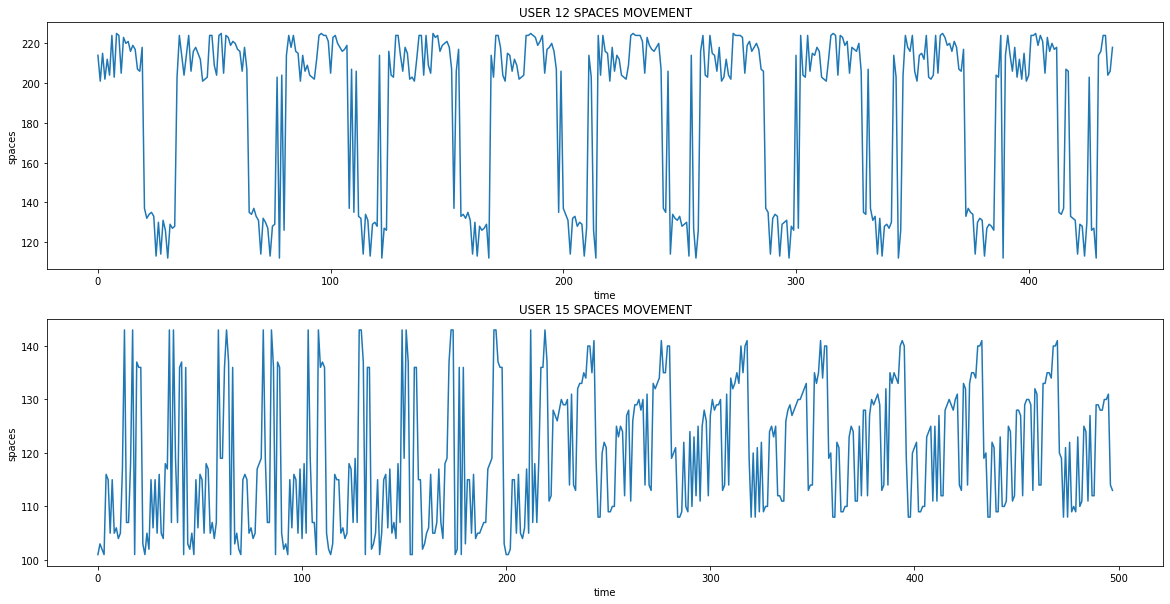

In [ ]:
plt.figure(figsize=(20,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

sns.lineplot(data=mdf[mdf['USERID']==12]['SPACEID'].to_numpy(), ax=ax1)
ax1.set_title('USER 12 SPACES MOVEMENT')
ax1.set_xlabel('time')
ax1.set_ylabel('spaces')

sns.lineplot(data=mdf[mdf['USERID']==15]['SPACEID'].to_numpy(), ax=ax2)
ax2.set_title('USER 15 SPACES MOVEMENT')
ax2.set_xlabel('time')
ax2.set_ylabel('spaces')

plt.show()